In [2]:
from sklearn import datasets, preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm.notebook import tqdm

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
preprocessed = data.copy()

In [6]:
encoder = LabelEncoder()
preprocessed['f_07'] = encoder.fit_transform(preprocessed['f_07'])
preprocessed['f_08'] = encoder.fit_transform(preprocessed['f_08'])
preprocessed['f_09'] = encoder.fit_transform(preprocessed['f_09'])
preprocessed['f_10'] = encoder.fit_transform(preprocessed['f_10'])
preprocessed['f_11'] = encoder.fit_transform(preprocessed['f_11'])
preprocessed['f_12'] = encoder.fit_transform(preprocessed['f_12'])
preprocessed['f_13'] = encoder.fit_transform(preprocessed['f_13'])

In [7]:
preprocessed.iloc[0:5, 7:13]

,f_06,f_07,f_08,f_09,f_10,f_11
0,2.258560,2,13,14,5,13
1,-0.090651,2,3,6,4,6
2,1.988301,5,11,5,8,9
3,0.138850,6,2,13,8,9
4,0.781898,8,7,5,3,1


In [8]:
norm = MinMaxScaler(feature_range=(0,1)).fit(data)
minmax = pd.DataFrame(norm.transform(data), columns=data.columns)
minmax.drop('id', axis = 'columns', inplace= True)
minmax

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.538866,0.687147,0.412625,0.514201,0.493436,0.513801,0.731116,0.15625,0.233333,0.181818,...,0.486993,0.489957,0.404091,0.615567,0.603631,0.649153,0.451594,0.410276,0.524980,0.531120
97996,0.548093,0.576142,0.552702,0.319744,0.486603,0.497475,0.570450,0.09375,0.300000,0.045455,...,0.530125,0.670252,0.557591,0.638793,0.516049,0.546457,0.548608,0.522255,0.572857,0.551405
97997,0.486066,0.438948,0.700789,0.317533,0.550976,0.415183,0.507669,0.25000,0.300000,0.227273,...,0.427752,0.322461,0.369744,0.400671,0.712424,0.606804,0.480162,0.661859,0.617652,0.545220
97998,0.546869,0.749086,0.574939,0.528828,0.582414,0.484191,0.512812,0.03125,0.266667,0.250000,...,0.516531,0.640757,0.700281,0.540071,0.614587,0.588578,0.428321,0.400851,0.462079,0.494422


In [32]:
scores = []

for k in range(5, 20):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(minmax)
    print(k)
    score = silhouette_score(minmax, labels, metric='euclidean')
    print( score)
    scores.append((k, score))



c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5
0.044012178882321666


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6
0.041095296141990506


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7
0.03971155032301241


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8
0.03674359394304202


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9
0.034422557103280044


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10
0.033092972998430926


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11
0.03277799589778757


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12
0.030123558621118013


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13
0.03012370377700033


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14
0.02961640739967887


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15
0.029489141860088726


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16
0.029470236097738592


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17
0.02921393357530829


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


18
0.029158432697560566


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


19
0.02910637466880531


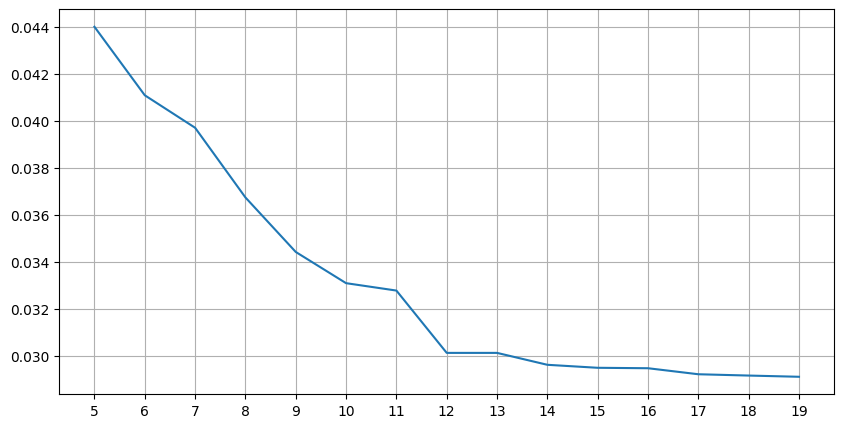

In [33]:
ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(range(2, 20))
plt.grid()
plt.plot(ax_x, ax_y)

In [39]:
scores2 = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    print(k)
    labels = kmeans.fit_predict(minmax)
    score = davies_bouldin_score(minmax, labels)
    print(score)
    scores2.append((k, score))


2


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.9665739057094864
3


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4.00926396444656
4


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.776705403771344
5


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6542318359168235
6


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.7483740681741993
7


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.7152261199315317
8


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.8606699450204447
9


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.980876191514943
10


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.9399517863769553
11


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.8591374287401763
12


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.9177253422532643
13


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.846770127186322
14


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.841262917057264
15


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.777289954930935
16


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.7635818718794805
17


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.72053151030055
18


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.754739684673939
19


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.7232360600463195
20


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.70089334820945
21


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6545219704662593
22


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.653696896442938
23


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6273780427899847
24


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6502275452967616
25


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6158500725936573
26


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6004312170009287
27


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6326922984117487
28


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.6094389814114622
29


c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3.5835544364867564


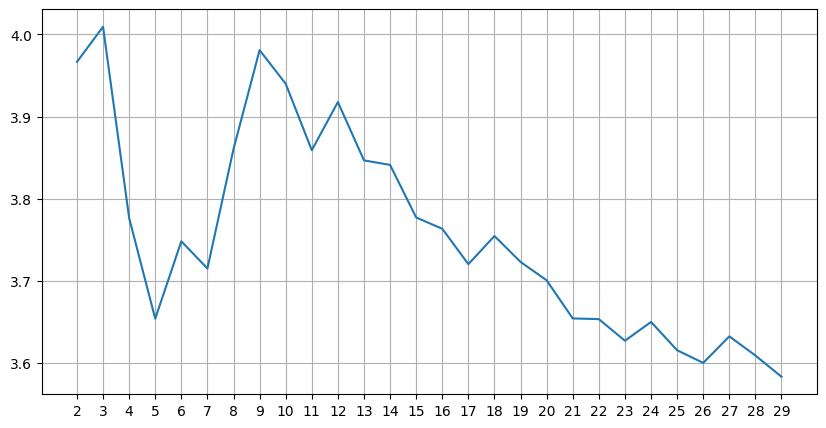

In [40]:
ax_x, ax_y = zip(*scores2)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(range(2, 30))
plt.grid()
plt.plot(ax_x, ax_y)

In [9]:
clusters = [5, 7, 11, 17, 23, 26, 29]

In [10]:
model1 = KMeans(n_clusters=5, max_iter=1000)
model1.fit(minmax)

model2 = KMeans(n_clusters=7, max_iter=1000)
model2.fit(minmax)

model3 = KMeans(n_clusters=11, max_iter=1000)
model3.fit(minmax)

model4 = KMeans(n_clusters=17, max_iter=1000)
model4.fit(minmax)

model5 = KMeans(n_clusters=23, max_iter=1000)
model5.fit(minmax)

model6 = KMeans(n_clusters=26, max_iter=1000)
model6.fit(minmax)

model7 = KMeans(n_clusters=29, max_iter=1000)
model7.fit(minmax)

c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\legion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

KMeans(max_iter=1000, n_clusters=29)

In [11]:
from sklearn.cluster import DBSCAN

model11 = DBSCAN(eps=0.007, min_samples=1, metric='cosine')
model11.fit(minmax)
model11.labels_

array([    0,     1,     2, ..., 97948, 97949, 97950], dtype=int64)

In [12]:
model12 = DBSCAN(eps=0.05, min_samples=3, metric='cosine')
model12.fit(minmax)

DBSCAN(eps=0.05, metric='cosine', min_samples=3)

<Axes: >

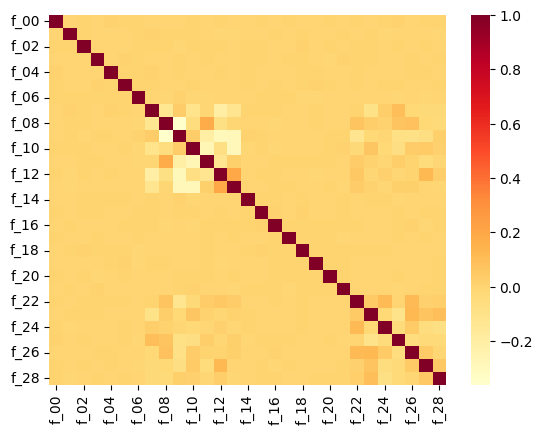

In [20]:
import seaborn as sns

sns.heatmap(minmax.corr(), cmap='YlOrRd')

C:\Users\legion\AppData\Local\Temp\ipykernel_41860\172151901.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\legion\AppData\Local\Temp\ipykernel_41860\172151901.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\legion\AppData\Local\Temp\ipykernel_41860\172151901.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\legion\AppData\Local\Temp\ipykernel_41860\172151901.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\legion\AppData\Local\Temp\ipykernel_41860\172151901.py:15: UserWarning: Matplotlib is currently using m

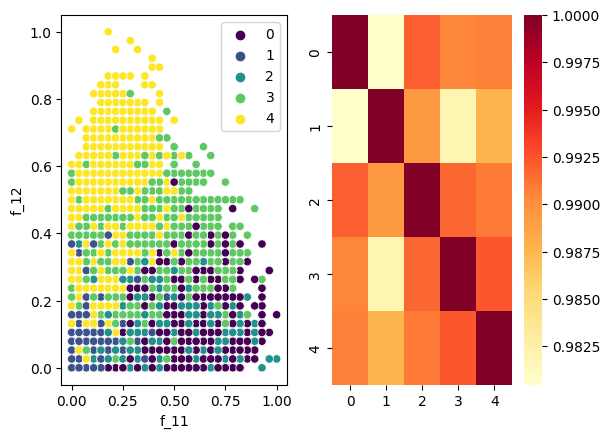

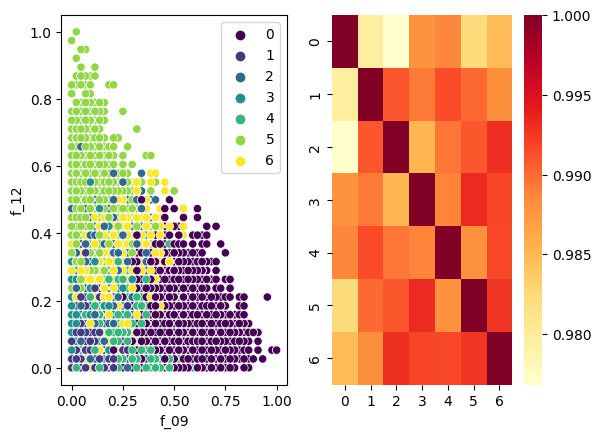

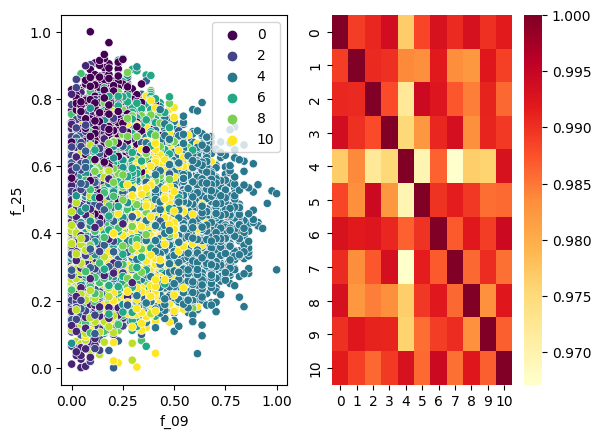

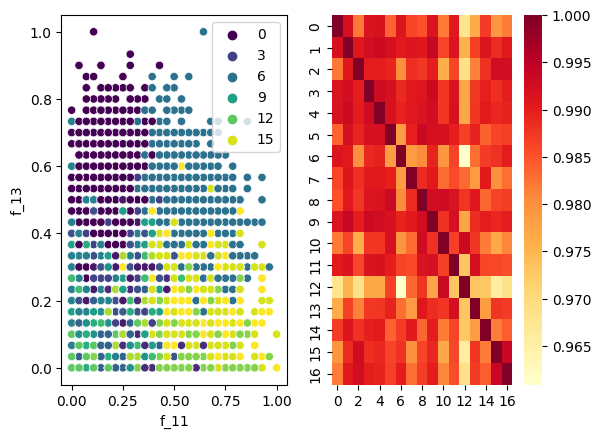

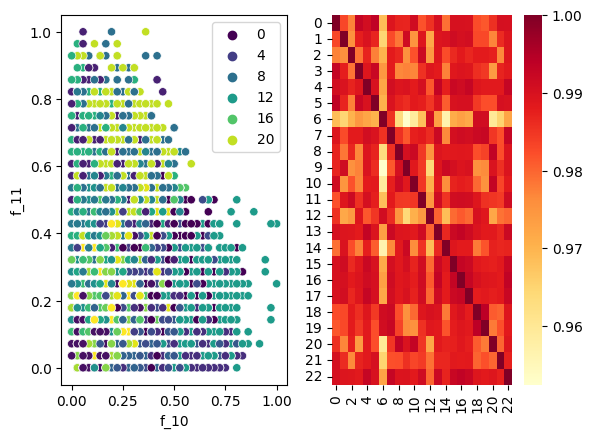

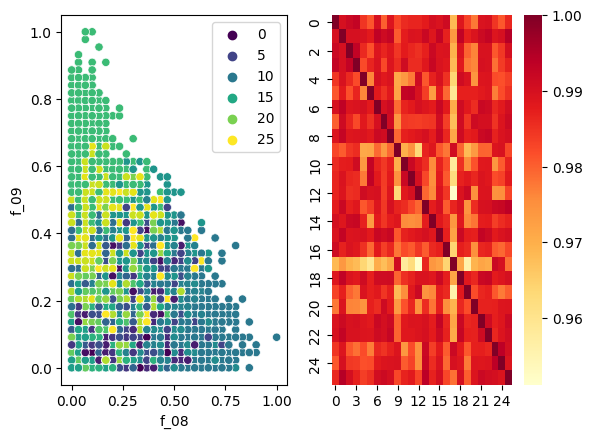

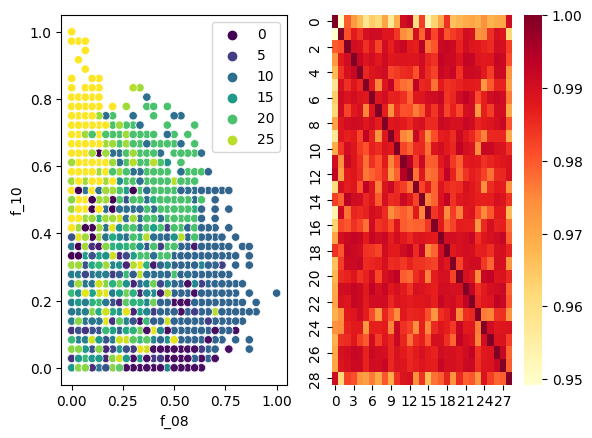

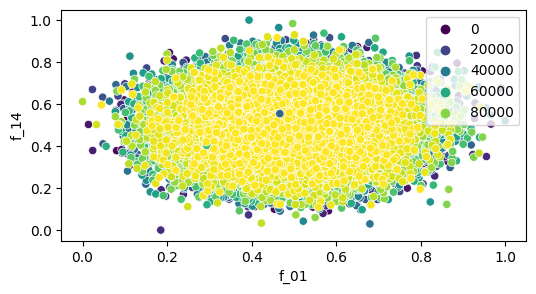

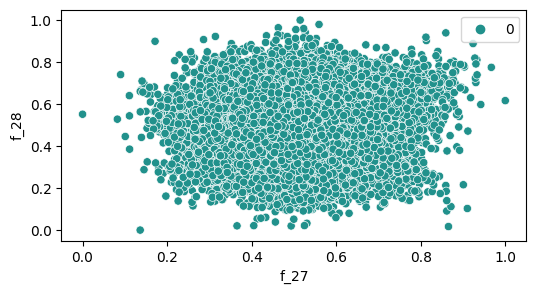

In [81]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics.pairwise import cosine_similarity
models = [model1, model2, model3, model4, model5, model6, model7]
for m in models:
    fig, ax = plt.subplots(1, 2)
    skb_object = SelectKBest(f_regression, k=2)
    data_new = skb_object.fit_transform(minmax, m.labels_)
    data_table = pd.DataFrame(data_new[:, 0:2])
    data_table.columns = [skb_object.get_feature_names_out()[0], skb_object.get_feature_names_out()[1]]
    data_table['Cluster'] = m.labels_
    sns.scatterplot(x=skb_object.get_feature_names_out()[0], y=skb_object.get_feature_names_out()[1], hue=m.labels_ ,data=data_table, palette='viridis', ax=ax[0])

    sns.heatmap(cosine_similarity(m.cluster_centers_), cmap='YlOrRd', ax=ax[1])

    fig.show()


fig = plt.figure(figsize=(6, 3))
skb_object = SelectKBest(f_regression, k=2)
data_new = skb_object.fit_transform(minmax, model11.labels_)
data_table = pd.DataFrame(data_new[:, 0:2])
data_table.columns = [skb_object.get_feature_names_out()[0], skb_object.get_feature_names_out()[1]]
data_table['Cluster'] = model11.labels_
sns.scatterplot(x=skb_object.get_feature_names_out()[0], y=skb_object.get_feature_names_out()[1], hue=model11.labels_ ,data=data_table, palette='viridis')
fig.show()

fig = plt.figure(figsize=(6, 3))
skb_object = SelectKBest(f_regression, k=2)
data_new = skb_object.fit_transform(minmax, model12.labels_)
data_table = pd.DataFrame(data_new[:, 0:2])
data_table.columns = [skb_object.get_feature_names_out()[0], skb_object.get_feature_names_out()[1]]
data_table['Cluster'] = model12.labels_
sns.scatterplot(x=skb_object.get_feature_names_out()[0], y=skb_object.get_feature_names_out()[1], hue=model12.labels_ ,data=data_table, palette='viridis')
fig.show()